In [2]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn import metrics
from sklearn import linear_model

**STEP 1 (10 pts.).**
**Load and prepare data**

In [3]:
# Load dataset
df = pd.read_csv('cars.csv')

In [4]:
# Dimesnions before cleaning
print(df.shape)

(5076, 18)


In [5]:
# Remove duplicates
df = df.drop_duplicates()

In [6]:
# Remove missing values
df = df.dropna(axis=1)

In [7]:
# Dropping columns that have no way to convert to numerical values
df = df.drop(columns=['Engine Information.Engine Type'])
df = df.drop(columns=['Engine Information.Transmission'])
df = df.drop(columns=['Identification.ID'])
df = df.drop(columns=['Identification.Make'])
df = df.drop(columns=['Identification.Model Year'])

In [8]:
# Dropping row for Drivetrain column to only two categorical features
df = df.drop(df[df['Engine Information.Driveline'].str.contains('All-wheel drive|Four-wheel drive')].index)

In [9]:
# Convert categorical features to numerical values
change = {'Rear-wheel drive' : 0, 'Front-wheel drive' : 1}
df['Engine Information.Driveline'] = df['Engine Information.Driveline'].map(change)

change = {'E85' : 0, 'Gasoline' : 1, 'Diesel fuel' : 2, 'Compressed natural gas' : 3}
df['Fuel Information.Fuel Type'] = df['Fuel Information.Fuel Type'].map(change)

change = {'Manual transmission' : 0, 'Automatic transmission' : 1}
df['Identification.Classification'] = df['Identification.Classification'].map(change)

change = {True : 0, False : 1}
df['Engine Information.Hybrid'] = df['Engine Information.Hybrid'].map(change)

In [10]:
# Dimensions
print(df.shape)

(3309, 13)


**STEP 2 (20 pts.).**
**Explore data**

In [11]:
# Display information for all features
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 3309 entries, 1 to 5075
Data columns (total 13 columns):
 #   Column                                           Non-Null Count  Dtype
---  ------                                           --------------  -----
 0   Dimensions.Height                                3309 non-null   int64
 1   Dimensions.Length                                3309 non-null   int64
 2   Dimensions.Width                                 3309 non-null   int64
 3   Engine Information.Driveline                     3309 non-null   int64
 4   Engine Information.Hybrid                        3309 non-null   int64
 5   Engine Information.Number of Forward Gears       3309 non-null   int64
 6   Fuel Information.City mpg                        3309 non-null   int64
 7   Fuel Information.Fuel Type                       3309 non-null   int64
 8   Fuel Information.Highway mpg                     3309 non-null   int64
 9   Identification.Classification                    3309 non

In [12]:
# Compute summary statistics for all features
print(df.describe())

       Dimensions.Height  Dimensions.Length  Dimensions.Width  \
count        3309.000000        3309.000000       3309.000000   
mean          147.050771         127.589302        143.002720   
std            61.964927          76.703962         80.026335   
min             1.000000           2.000000          1.000000   
25%           104.000000          60.000000         57.000000   
50%           155.000000         128.000000        158.000000   
75%           193.000000         198.000000        219.000000   
max           255.000000         255.000000        254.000000   

       Engine Information.Driveline  Engine Information.Hybrid  \
count                   3309.000000                     3309.0   
mean                       0.473859                        0.0   
std                        0.499392                        0.0   
min                        0.000000                        0.0   
25%                        0.000000                        0.0   
50%               

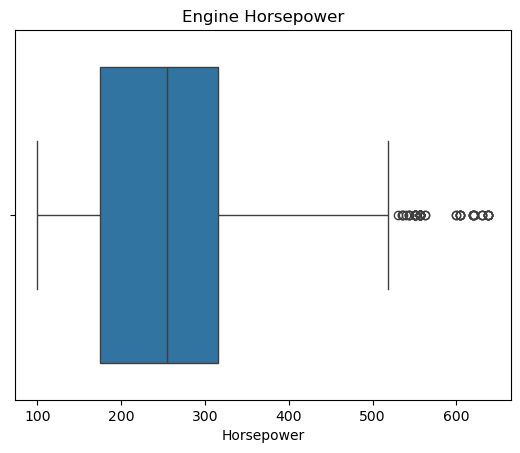

In [13]:
# Box Plot of 'Engine Information.Engine Statistics.Horsepower'
ax = sns.boxplot(data=df, x='Engine Information.Engine Statistics.Horsepower')
ax.set_title('Engine Horsepower')
ax.set_xlabel('Horsepower')
plt.show()

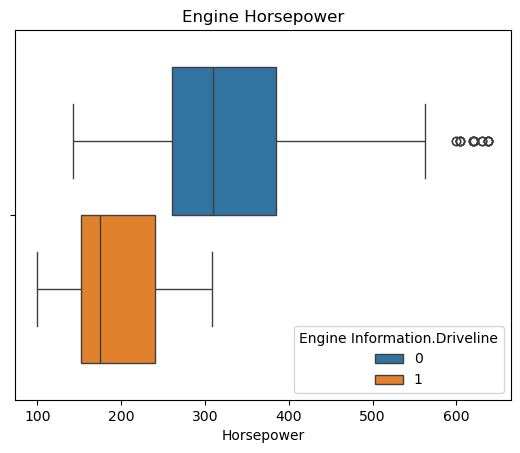

In [14]:
# Box Plot of 'Engine Information.Engine Statistics.Horsepower' grouped by  'Engine Information.Driveline'
ax = sns.boxplot(data=df, x='Engine Information.Engine Statistics.Horsepower', hue='Engine Information.Driveline')
ax.set_title('Engine Horsepower')
ax.set_xlabel('Horsepower')
plt.show()

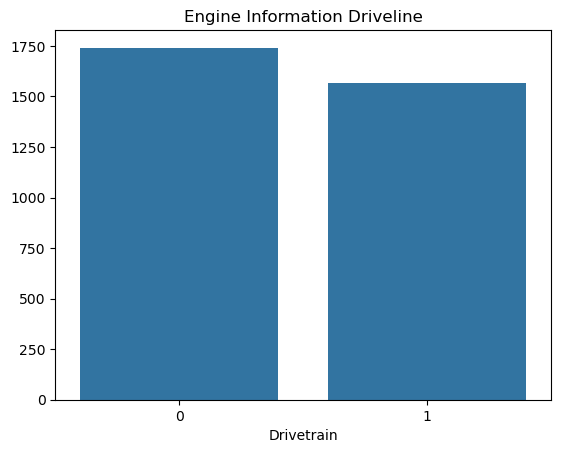

In [15]:
# Bar chart of 'Engine Information.Driveline'
ax = sns.countplot(data=df, x='Engine Information.Driveline')
ax.set_title('Engine Information Driveline')
ax.set_xlabel('Drivetrain')
ax.set_ylabel('')
plt.show()

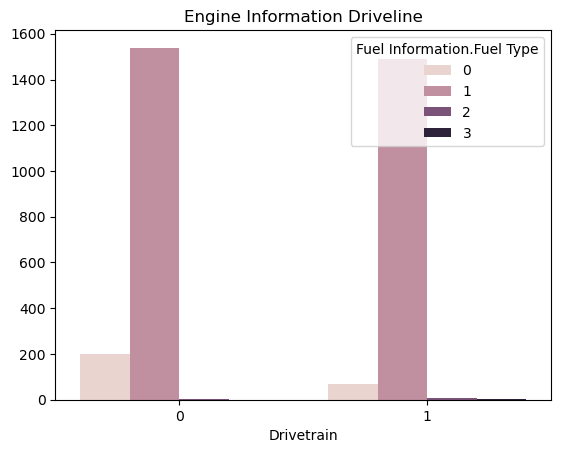

In [16]:
# Bar chart of 'Engine Information.Driveline' grouped by 'Engine Information.Engine Statistics.Horsepower'
ax = sns.countplot(data=df, x='Engine Information.Driveline', hue='Fuel Information.Fuel Type')
ax.set_title('Engine Information Driveline')
ax.set_xlabel('Drivetrain')
ax.set_ylabel('')
plt.show()


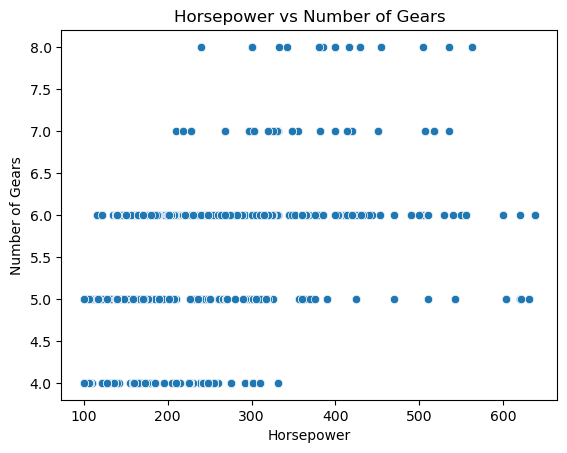

In [17]:
# Scatter Plot of 'Engine Information.Engine Statistics.Horsepower'
ax = sns.scatterplot(data=df, x='Engine Information.Engine Statistics.Horsepower', y='Engine Information.Number of Forward Gears')
ax.set_title('Horsepower vs Number of Gears')
ax.set_ylabel('Number of Gears')
ax.set_xlabel('Horsepower')
plt.show()

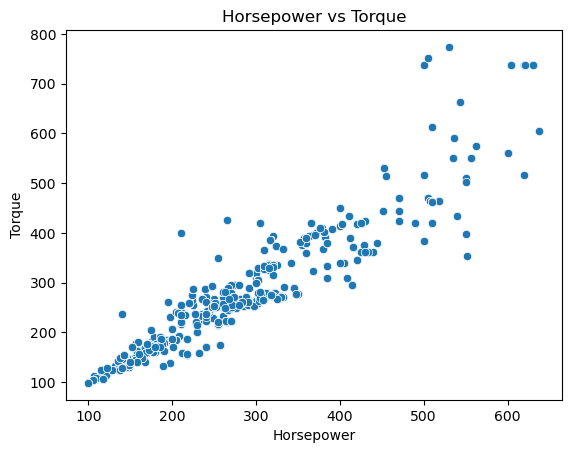

In [18]:
## Scatter Plot of 'Engine Information.Engine Statistics.Horsepower' vs 'Engine Information.Number of Forward Gears'
ax = sns.scatterplot(data=df, x='Engine Information.Engine Statistics.Horsepower', y='Engine Information.Engine Statistics.Torque')
ax.set_title('Horsepower vs Torque')
ax.set_ylabel('Torque')
ax.set_xlabel('Horsepower')
plt.show()

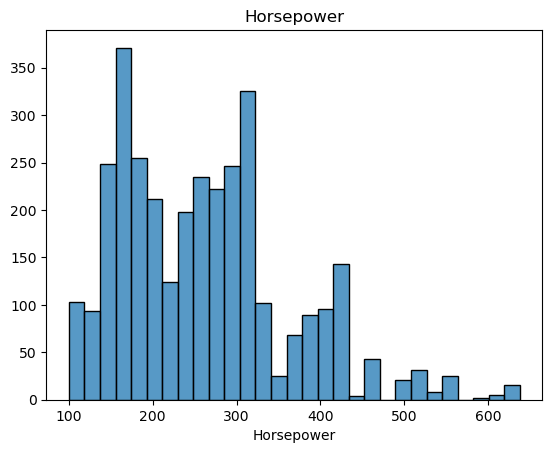

In [19]:
# Histogram of Drivetrain
ax = sns.histplot(data=df, x='Engine Information.Engine Statistics.Horsepower')
ax.set_title('Horsepower')
ax.set_xlabel('Horsepower')
ax.set_ylabel('')
plt.show()

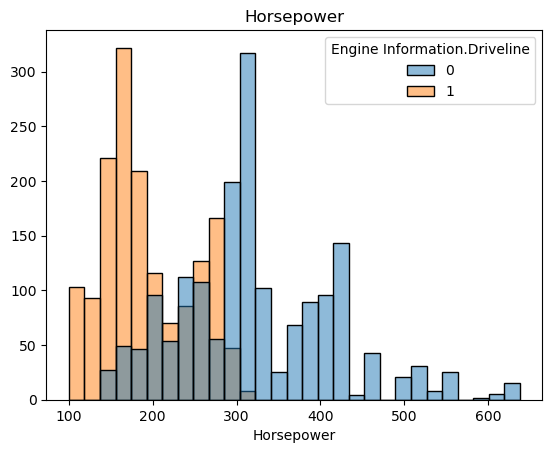

In [20]:
# Histogram of Horsepower grouped by Torque
ax = sns.histplot(data=df, x='Engine Information.Engine Statistics.Horsepower', hue='Engine Information.Driveline')
ax.set_title('Horsepower')
ax.set_xlabel('Horsepower')
ax.set_ylabel('')
plt.show()

**STEP 3 (20 pts.).**
**Build and evaluate classification models from data**

In [21]:
# Partition data into training and testing
x = df.drop(columns=['Engine Information.Driveline'])
x_train, x_test, y_train, y_test = train_test_split(x, df['Engine Information.Driveline'], test_size=0.2, random_state=0)

In [22]:
# Define function to plot decision tree (REMEMBER TO RUN THIS CELL!)
def plot_tree(model, predictors):
    classes = [str(i) for i in model.classes_] # class labels
    plt.figure(figsize = (15, 15)) # set figure size (if needed)
    tree.plot_tree(model,
                   feature_names = predictors,  # feature_names indicates the names of the predictors
                   class_names = classes,       # class_names indicates the names of the classes
                   filled = True, impurity = False)
    plt.show()

In [23]:
# Build and train decision tree using training set
model = DecisionTreeClassifier()
model.fit(x_train, y_train)

DecisionTreeClassifier()

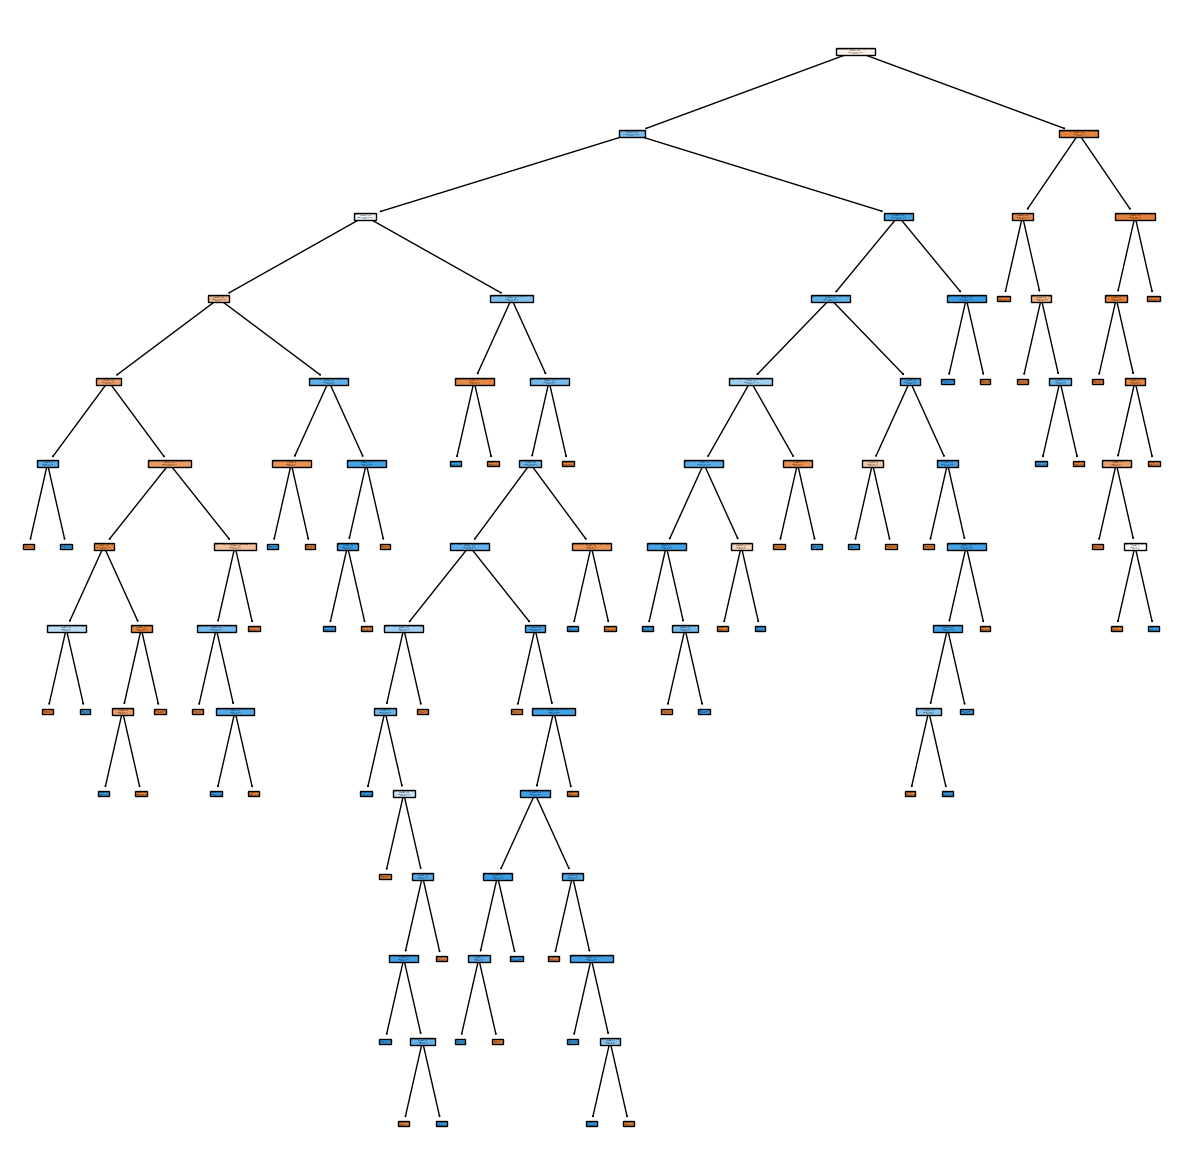

In [24]:
# Plot decision tree
predictors = x_train.columns
plot_tree(model, predictors)

In [25]:
# Evaluate decision tree using test set
y_pred = model.predict(x_test)
conf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(conf_matrix)
accuracy = metrics.accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
# Compute and print error
error = 1 - accuracy
print(f'Error: {error}')
# Compute and print precision
precision = metrics.precision_score(y_test, y_pred, average=None)
print(f'Precision: {precision}')
# Compute and print recall
recall = metrics.recall_score(y_test, y_pred, average=None)
print(f'Recall: {recall}')
# Compute and print F1 score
F1_score = metrics.f1_score(y_test, y_pred, average=None)
print(f'F1_score: {F1_score}')

[[337   4]
 [  2 319]]
Accuracy: 0.9909365558912386
Error: 0.009063444108761365
Precision: [0.99410029 0.9876161 ]
Recall: [0.98826979 0.99376947]
F1_score: [0.99117647 0.99068323]


In [26]:
# Decision Tree Model with max_depth = 2 and random_state = 0
model = DecisionTreeClassifier(max_depth=2, random_state=0)
model.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=0)

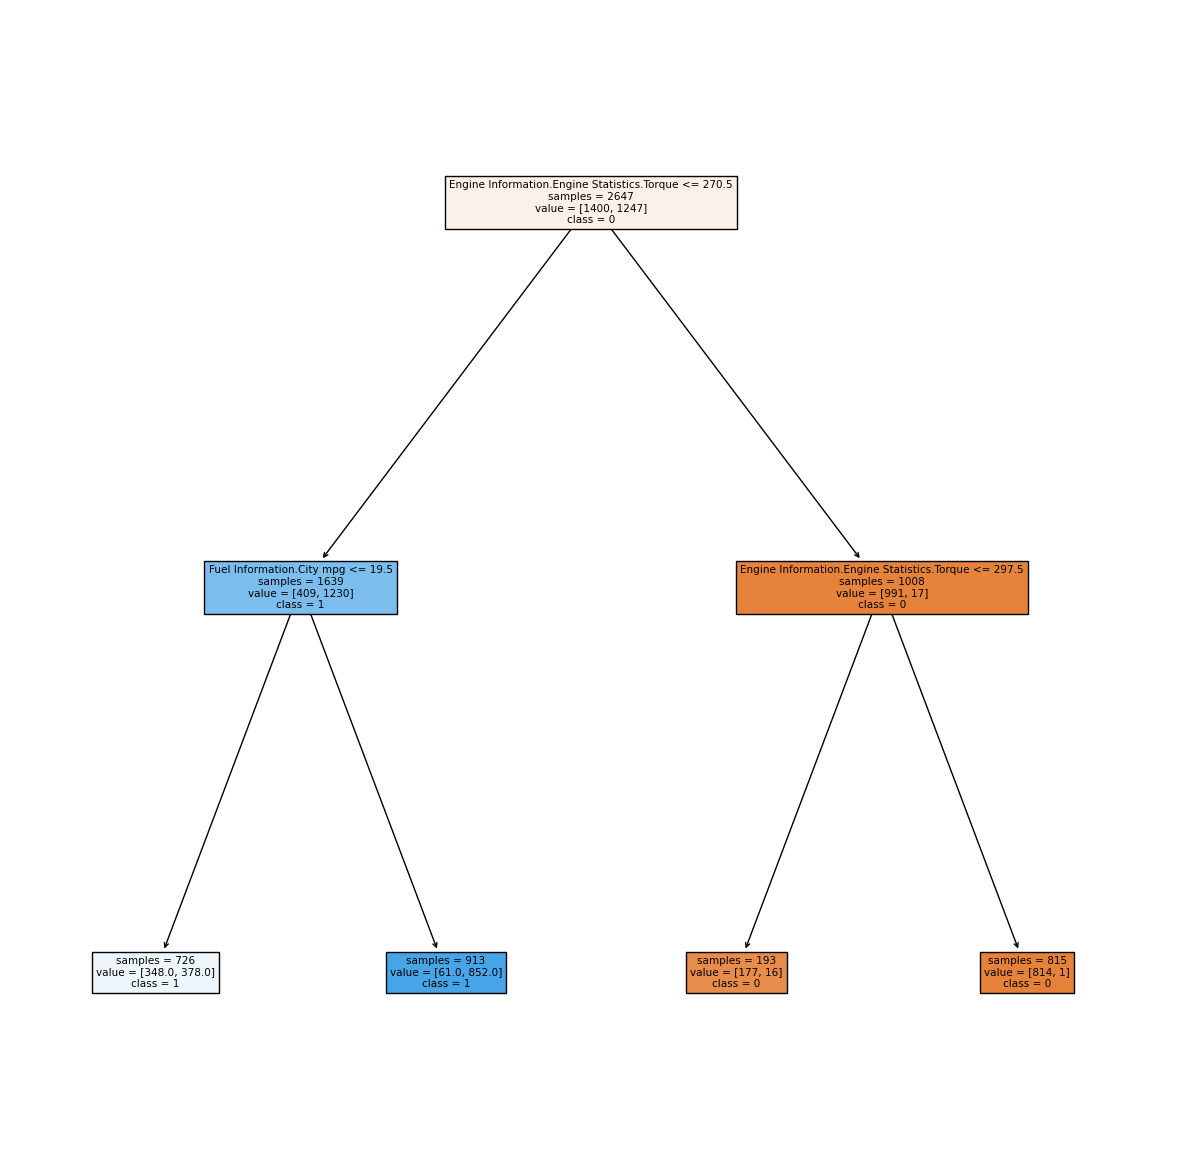

In [27]:
# Plot Decision Tree
predictors = x_train.columns
plot_tree(model, predictors)

In [28]:
# Evaluating Decision Tree with max_depth = 2 and random_state = 2
y_pred = model.predict(x_test)
conf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(conf_matrix)
accuracy = metrics.accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
# Compute and print error
error = 1 - accuracy
print(f'Error: {error}')
# Compute and print precision
precision = metrics.precision_score(y_test, y_pred, average=None)
print(f'Precision: {precision}')
# Compute and print recall
recall = metrics.recall_score(y_test, y_pred, average=None)
print(f'Recall: {recall}')
# Compute and print F1 score
F1_score = metrics.f1_score(y_test, y_pred, average=None)
print(f'F1_score: {F1_score}')

[[239 102]
 [  2 319]]
Accuracy: 0.8429003021148036
Error: 0.1570996978851964
Precision: [0.99170124 0.75771971]
Recall: [0.70087977 0.99376947]
F1_score: [0.82130584 0.85983827]


In [29]:
# Decision Tree Model with max_depth = 5 and random_state = 0
model = DecisionTreeClassifier(max_depth=5, random_state=0)
model.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=0)

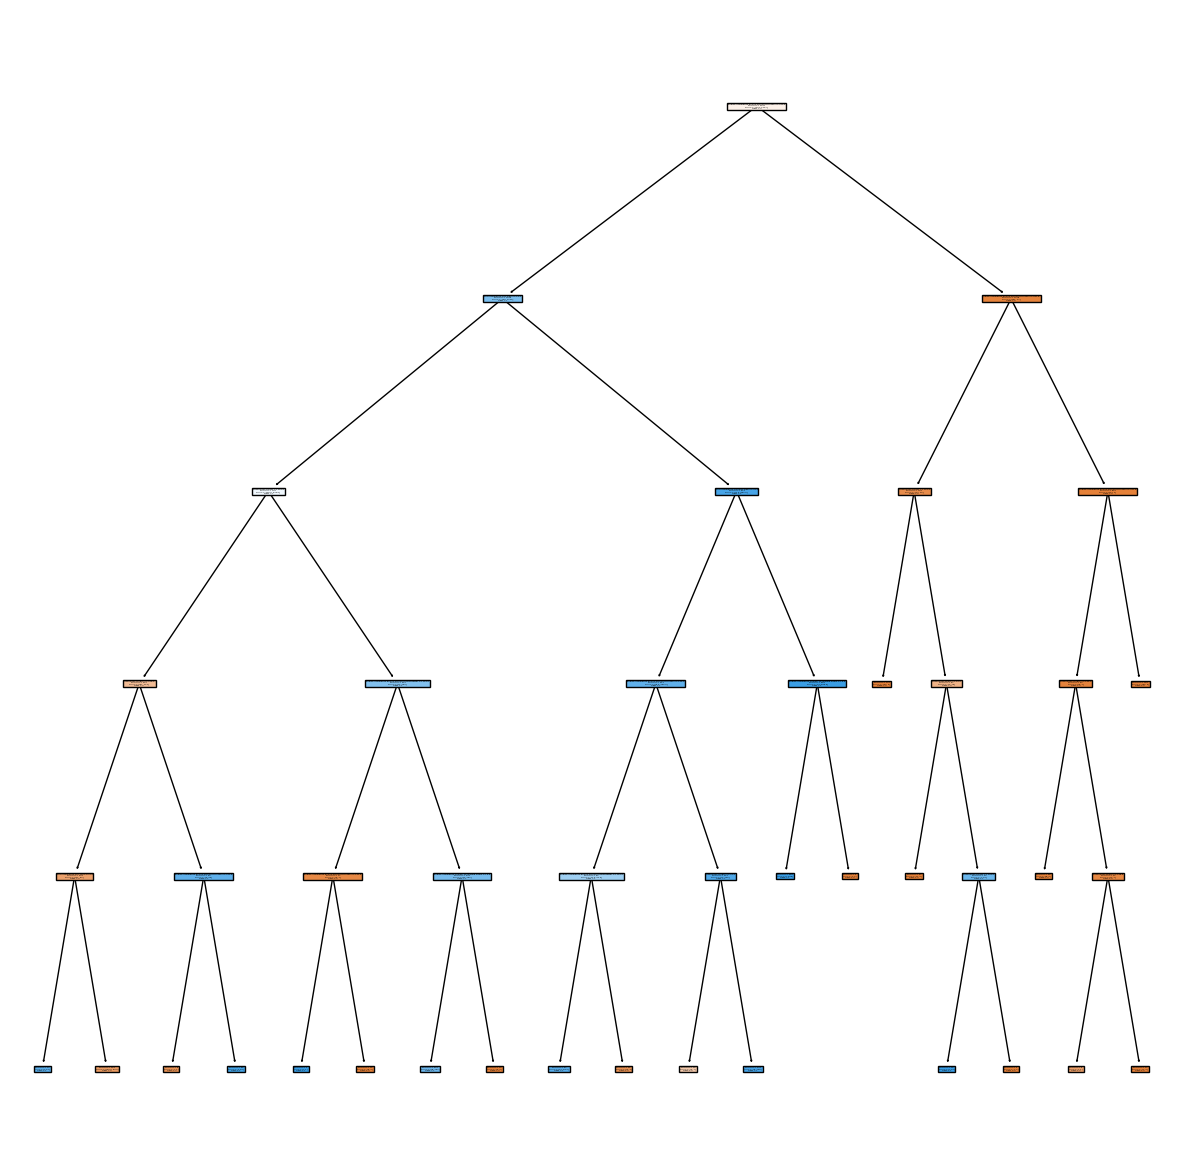

In [30]:
# Plot Decision Tree
predictors = x_train.columns
plot_tree(model, predictors)

In [31]:
# Evaluate Decision tree with a max_depth = 5 and random_state = 0
y_pred = model.predict(x_test)
conf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(conf_matrix)
accuracy = metrics.accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
# Compute and print error
error = 1 - accuracy
print(f'Error: {error}')
# Compute and print precision
precision = metrics.precision_score(y_test, y_pred, average=None)
print(f'Precision: {precision}')
# Compute and print recall
recall = metrics.recall_score(y_test, y_pred, average=None)
print(f'Recall: {recall}')
# Compute and print F1 score
F1_score = metrics.f1_score(y_test, y_pred, average=None)
print(f'F1_score: {F1_score}')

[[319  22]
 [ 27 294]]
Accuracy: 0.9259818731117825
Error: 0.07401812688821752
Precision: [0.92196532 0.93037975]
Recall: [0.93548387 0.91588785]
F1_score: [0.9286754  0.92307692]


**STEP 4 (20 pts.).**
**Build and evaluate regression models from data**

In [32]:
# Partition data into training and testing
x = df.drop(columns=['Engine Information.Engine Statistics.Horsepower'])
x_train, x_test, y_train, y_test = train_test_split(x, df['Engine Information.Engine Statistics.Horsepower'], test_size=0.2, random_state=0)

In [33]:
# Build and train linear regression model using training set
model = linear_model.LinearRegression()
model.fit(x_train[['Engine Information.Number of Forward Gears']], y_train)

LinearRegression()

In [34]:
# Print intercept and coefficient of model
print(model.intercept_)
print(model.coef_)

33.19069946807937
[41.65968757]


In [35]:
# Use simple linear regression model to predict Horsepower for the test set
y_pred = model.predict(x_test[['Engine Information.Number of Forward Gears']])

In [36]:
# Evaluate Regression Model
MSE = metrics.mean_squared_error(y_test, y_pred)
print(f'MSE: {MSE}')
RMSE = metrics.root_mean_squared_error(y_test, y_pred)
print(f'RMSE: {RMSE}')
R_squared = metrics.r2_score(y_test, y_pred)
print(f'R_squared: {R_squared}')

MSE: 8579.056333282611
RMSE: 92.62319543873777
R_squared: 0.1421239191210999


In [37]:
# Evaluate Regression models with more predictors
model = linear_model.LinearRegression()
model.fit(x_train[['Engine Information.Number of Forward Gears', 'Engine Information.Driveline', 'Fuel Information.City mpg']], y_train)

LinearRegression()

In [38]:
# Print intercept and coefficient of model
print(model.intercept_)
print(model.coef_)

289.94506848556716
[ 36.82918469 -55.11627238 -11.25577969]


In [39]:
# Use simple linear regression model to predict Horsepower for the test set
y_pred = model.predict(x_test[['Engine Information.Number of Forward Gears', 'Engine Information.Driveline', 'Fuel Information.City mpg']])

In [40]:
# Evaluate Regression Model
MSE = metrics.mean_squared_error(y_test, y_pred)
print(f'MSE: {MSE}')
RMSE = metrics.root_mean_squared_error(y_test, y_pred)
print(f'RMSE: {RMSE}')
R_squared = metrics.r2_score(y_test, y_pred)
print(f'R_squared: {R_squared}')

MSE: 3297.1560996399985
RMSE: 57.420868154704856
R_squared: 0.6702957478164931


In [41]:
# Evaluate Regression models with more predictors
model = linear_model.LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [42]:
# Print intercept and coefficient of model
print(model.intercept_)
print(model.coef_)

-1154.461755712543
[-1.08868853e-02 -1.26117276e-02 -1.14449562e-01 -8.10961854e+00
 -1.07969189e-14  1.38069256e+01 -1.24545089e+00  6.35047584e+00
  3.44516306e-01 -8.45048660e+00  5.75864375e-01  8.41013754e-01]


In [43]:
# Use simple linear regression model to predict Horsepower for the test set
y_pred = model.predict(x_test)

In [44]:
# Evaluate Regression Model
MSE = metrics.mean_squared_error(y_test, y_pred)
print(f'MSE: {MSE}')
RMSE = metrics.root_mean_squared_error(y_test, y_pred)
print(f'RMSE: {RMSE}')
R_squared = metrics.r2_score(y_test, y_pred)
print(f'R_squared: {R_squared}')

MSE: 767.7019272465396
RMSE: 27.707434512176324
R_squared: 0.9232324517937462
